## Predict Customer Personality to Boost Marketing Campaign

**Table of Content:**

- Introduction
- Load Dataset
- Exploratory Data Analysis
- Data Preprocessing
- Modeling
- Save Model

# Introduction

**Background**

Dengan memahami apa yang pelanggan sukai, butuhkan, dan bagaimana mereka membeli produk kita, kita bisa memberikan layanan yang lebih baik sesuai dengan kebutuhan mereka. Dengan memahami pelanggan, kita bisa memberikan pengalaman yang lebih menyenangkan dan memuaskan bagi mereka. Hal ini akan membuat pelanggan lebih puas dan akhirnya akan meningkatkan penjualan kita. Untuk memahami pelanggan, kita bisa menggunakan metode pengelompokkan. Dengan pengelompokkan, kita bisa membagi pelanggan menjadi kelompok-kelompok berdasarkan karakteristiknya. Hal ini akan membantu kita menyusun strategi penjualan yang lebih efektif dan sesuai dengan kebutuhan setiap kelompok pelanggan. Oleh karena itu, memahami pelanggan adalah hal yang penting untuk meningkatkan penjualan dan mencapai kesuksesan jangka panjang bagi perusahaan.

**Goal**

Tujuan dari analisis profil dan perilaku pelanggan dengan pendekatan clustering adalah untuk meningkatkan pemahaman perusahaan tentang pelanggan. Dengan pemahaman yang lebih baik tentang pelanggan, perusahaan dapat menyediakan layanan yang lebih personal, meningkatkan performa penjualan, dan membangun hubungan yang kuat dengan pelanggan.

**Objective**

Berikut adalah objective dari analisis profil dan perilaku pelanggan dengan pendekatan clustering, dalam kalimat yang lebih mudah dipahami:

- Membuat model machine learning yang dapat mengelompokkan pelanggan berdasarkan karakteristik dan perilaku mereka.
Tujuan pertama adalah membuat model yang dapat membagi pelanggan menjadi kelompok-kelompok berdasarkan ciri-ciri dan cara mereka berperilaku.

- Mengekstraksi insight yang lebih mendalam tentang profil dan perilaku pelanggan.
Tujuan kedua adalah memahami lebih lanjut tentang pelanggan, seperti apa yang mereka sukai, butuhkan, dan bagaimana mereka berperilaku.

- Menentukan strategi bisnis yang efektif dari hasil clustering.
Tujuan ketiga adalah menggunakan pemahaman tentang pelanggan untuk membuat strategi bisnis yang lebih efektif.

**Business Matric**

Conversion Rate

| Feature | Description |
| --- | --- |
| `ID` | ID unik dari setiap pelanggan |
| `Year_Birth` | tahun kelahiran pelanggan |
| `Dt_Customer` | tanggal pendaftaran pelanggan dengan perusahaan (gabung member) |
| `Education` | tingkat pendidikan pelanggan |
| `Marital_Status` | status pernikahan pelanggan |
| `Kidhom` | jumlah anak kecil dalam rumah tangga pelanggan |
| `Teenhom` | jumlah remaja dalam rumah tangga pelanggan |
| `Income` | pendapatan rumah tangga pelanggan per tahun |
| `MntFishProducts` | jumlah yang dibelanjakan untuk produk ikan dalam 2 tahun terakhir |
| `MntMeatProducts` | jumlah yang dibelanjakan untuk produk daging dalam 2 tahun terakhir |
| `MntFruits` | jumlah yang dibelanjakan untuk produk buah-buahan dalam 2 tahun terakhir |
| `MntSweetProducts` | jumlah yang dibelanjakan untuk produk manis dalam 2 tahun terakhir |
| `MntWines` | jumlah yang dibelanjakan untuk produk anggur dalam 2 tahun terakhir |
| `MntGoldProds` | jumlah yang dibelanjakan untuk produk emas dalam 2 tahun terakhir |
| `NumDealsPurchases` | jumlah pembelian yang dilakukan dengan diskon |
| `NumCatalogPurchases` | jumlah pembelian yang dilakukan dengan menggunakan katalog (membeli barang yang akan dikirim melalui pos) |
| `NumStorePurchases` | jumlah pembelian yang dilakukan secara langsung di toko |
| `NumWebPurchases` | jumlah pembelian yang dilakukan melalui situs web perusahaan |
| `NumWebVisitsMonth` | jumlah kunjungan ke situs web perusahaan dalam satu bulan terakhir |
| `Recency` | jumlah hari sejak pembelian terakhir |
| `Response` | 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak |

# Load Dataset

## Read Dataset

In [2]:
# mengimport library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import yellowbrick

In [3]:
color =  ['steelblue', 'indianred', 'grey', 'orange', 'olive']

In [4]:
# read dataset
df = pd.read_csv('marketing_campaign_data.csv')

In [5]:
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1873,1873,6715,1948,S3,Lajang,60200000.0,0,1,02-01-2013,3,...,6,0,0,0,0,0,0,3,11,0
193,193,1324,1988,S1,Menikah,38872000.0,1,0,30-05-2013,93,...,8,0,0,0,0,0,0,3,11,0
1400,1400,4094,1961,S1,Menikah,60544000.0,1,1,25-08-2012,92,...,6,0,0,0,0,0,0,3,11,0
1393,1393,5289,1975,D3,Lajang,41658000.0,1,1,09-11-2012,30,...,4,0,0,0,0,0,0,3,11,0
1449,1449,1927,1973,D3,Bertunangan,69401000.0,0,1,23-03-2014,41,...,2,0,0,0,0,0,0,3,11,0


## Overview Dataset

In [6]:
df.shape

(2240, 30)

In [7]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Unnamed: 0,int64,0,0.00,2240,"[0, 1, 2, 3, 4]"
1,ID,int64,0,0.00,2240,"[5524, 2174, 4141, 6182, 5324]"
2,Year_Birth,int64,0,0.00,59,"[1957, 1954, 1965, 1984, 1981]"
3,Education,object,0,0.00,5,"[S1, S3, S2, SMA, D3]"
4,Marital_Status,object,0,0.00,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
5,Income,float64,24,1.07,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
6,Kidhome,int64,0,0.00,3,"[0, 1, 2]"
7,Teenhome,int64,0,0.00,3,"[0, 1, 2]"
8,Dt_Customer,object,0,0.00,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
9,Recency,int64,0,0.00,100,"[58, 38, 26, 94, 16]"


In [8]:
df.duplicated().sum()

0

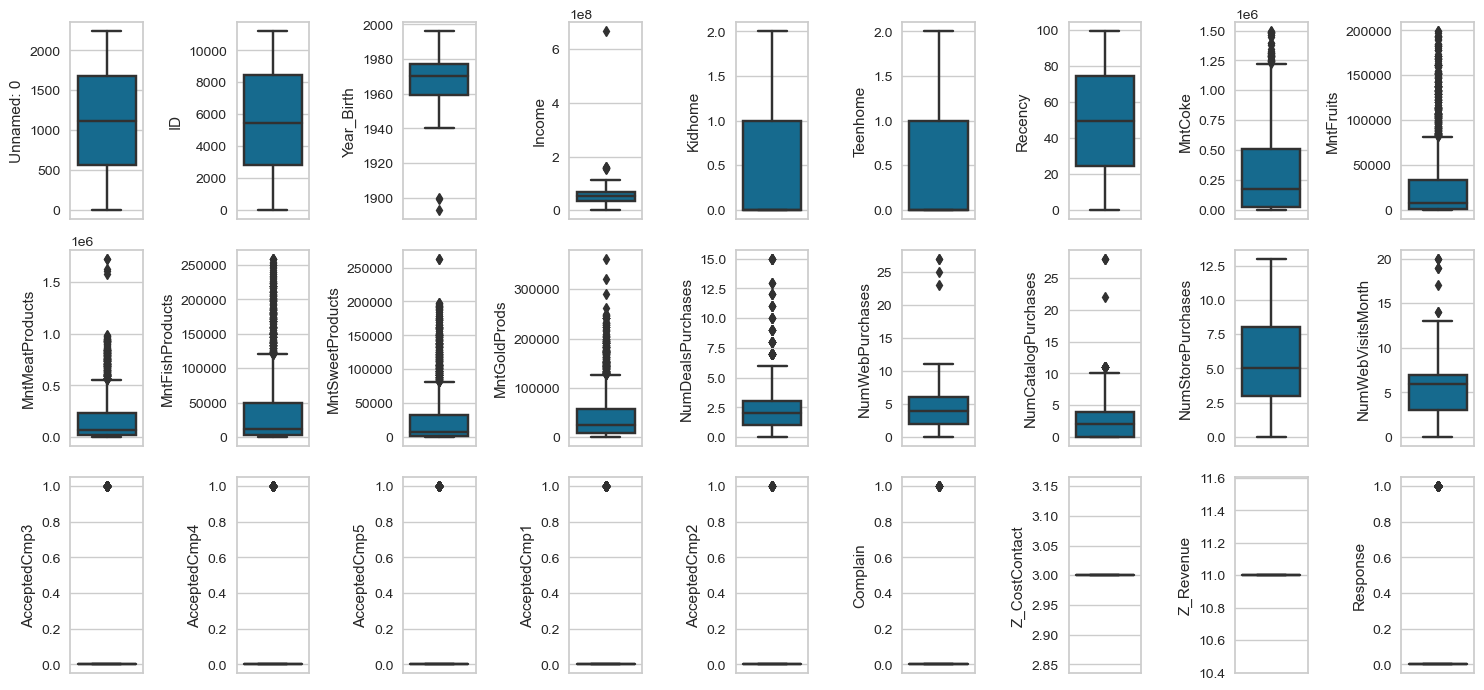

In [9]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()

plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

### **Key Takeaways**

Berikut adalah key takeaways dari data yang diberikan:

- **Jumlah data**
Dataset terdiri dari **30 fitur dan 2240 baris**. Jumlah data yang cukup besar ini memungkinkan untuk dilakukan analisis yang lebih mendalam.

- **Missing value**
Missing value terdapat pada fitur **Income**. Missing value ini perlu ditangani sebelum dilakukan analisis.

- **Data duplikat**
Tidak ada data yang duplikat. Hal ini menunjukkan bahwa data sudah dibersihkan dengan baik.

- **Outlier**
Secara keseluruhan data cenderung memiliki outlier. Nilai ekstrim terlihat pada fitur **Income dan Year_Birth**. Outlier ini perlu ditangani agar tidak mempengaruhi hasil analisis.

- **Analisis konversi rate**
Pada tahap Exploratory Data Analysis, akan dilakukan analisis konversi rate. Analisis ini bertujuan untuk mencari wawasan dari data persentase pengunjung sebuah situs web dan tindakan apa yang mereka lakukan selama mengunjungi situs tersebut, serta apakah tindakan mereka menghasilkan transaksi pembelian atau tidak selama kunjungan di situs web tersebut.

- **Proses pembersihan data dan pengembangan fitur**
Sebelum melakukan analisis konversi rate, akan dilakukan proses pembersihan data (data cleaning) dan pengembangan fitur (feature engineering) pada variabel data yang ada. Hal ini dilakukan untuk menghasilkan sebuah kolom baru yang disebut Conversion rate, serta beberapa kolom fitur lain seperti umur, penghasilan, pengeluaran, dan sebagainya. Dengan adanya fitur-fitur ini, diharapkan dapat menemukan pola perilaku konsumen yang dapat memberikan informasi berharga dalam analisis konversi rate.

### **Rekomendasi**

Berdasarkan key takeaways yang telah disebutkan, berikut adalah beberapa rekomendasi untuk analisis data yang akan dilakukan:

- **Penanganan missing value**
Missing value pada fitur Income dapat ditangani dengan menggunakan metode imputation, seperti mean imputation atau median imputation. Metode imputation yang dipilih harus disesuaikan dengan karakteristik data.

- **Penanganan outlier**
Outlier pada fitur Income dan Year_Birth dapat ditangani dengan menggunakan metode outlier detection, seperti metode IQR. Metode outlier detection yang dipilih harus disesuaikan dengan karakteristik data.

- **Pengembangan fitur**
Pengembangan fitur baru dapat dilakukan dengan menggunakan metode feature engineering. Metode feature engineering yang dipilih harus disesuaikan dengan tujuan analisis yang ingin dilakukan.

Dengan melakukan penanganan missing value, penanganan outlier, dan pengembangan fitur, diharapkan data yang digunakan untuk analisis konversi rate menjadi lebih bersih dan akurat. Hal ini dapat menghasilkan analisis yang lebih berkualitas dan memberikan informasi yang lebih berharga bagi perusahaan.

## Data Cleaning

In [10]:
df1 = df.copy()

In [11]:
df1.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Handling Outlier

In [12]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))
for col in ['Year_Birth','Income', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases']:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df1[col] >= low_limit) & (df1[col] <= high_limit)) & filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 2240
Jumlah baris setelah memfilter outlier: 1840


Hasil sesudah dilakukan handling outlier.

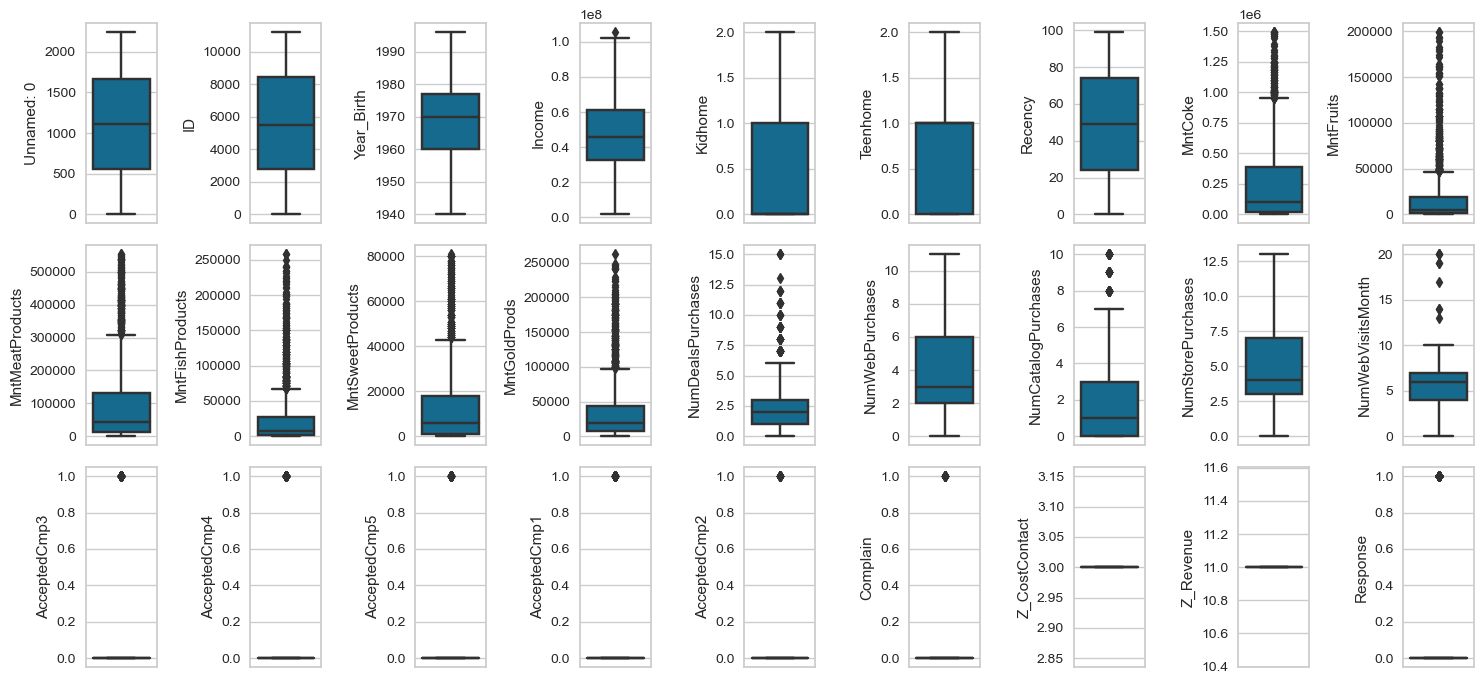

In [13]:
nums = df1.loc[:, (df1.dtypes == 'int64') | (df1.dtypes == 'float64')].columns.tolist()
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df1[nums[i]], orient='v')
    plt.tight_layout()

### Handling Missing Value

Handling missing value dilakukan dengan imputasi nilai median (robust)

In [14]:
df1.fillna(df1['Income'].median(), inplace=True)

In [15]:
df1.isna().sum().sum()

0

## Feature Engineering

### Membership Duration

Membuat fitur durasi membership dari fitur Dt_Customer

In [16]:
# konversi ke datetime
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])

# membuat kolom baru durasi membership
# ------------------------------------------------------------
df1['Membership_Duration'] = 2023 - df1['Dt_Customer'].dt.year

In [17]:
df1['Membership_Duration'].value_counts()

10    975
9     471
11    394
Name: Membership_Duration, dtype: int64

### Customer Age

Usia pelanggan dapat diekstraksi dari fitur Year_Birth

In [18]:
# menambahkan kolom usia
df1['Age'] = 2023 - df1['Year_Birth']

In [19]:
print(f'min age: {df1.Age.min()}')
print(f'max age: {df1.Age.max()}')

min age: 27
max age: 83


In [20]:
# mengkategorikan berdasarkan usia
df1['Age_Categories'] = np.where(df1['Age'] < 40, 'Young Adult',
                      np.where(df1['Age'] < 60, 'Middle-Aged Adult',
                               'Old Adult'))

In [21]:
df1['Age_Categories'].value_counts()

Middle-Aged Adult    1038
Old Adult             597
Young Adult           205
Name: Age_Categories, dtype: int64

## Total Children

Fitur ini merepresentasikan jumlah anak yang dimiliki oleh pelanggan



In [22]:
# total anak
df1['Total_Children'] = df1['Kidhome'] + df1['Teenhome']

In [23]:
df1['Total_Children'].value_counts()

1    1027
2     405
0     359
3      49
Name: Total_Children, dtype: int64

## Total Transaction

Fitur ini merepresentasikan total keseluruhan transaksi yang telah dilakukan oleh pelanggan.

In [24]:
df1['Total_Transaction'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']

In [25]:
df1['Total_Transaction'].value_counts()

7     148
5     143
4     124
6     122
9     100
8      93
17     89
16     81
10     78
21     69
12     68
20     67
11     64
15     61
23     59
19     59
22     56
18     53
14     47
25     44
26     43
13     40
24     35
27     27
28     25
32     11
31      9
29      8
30      7
2       2
1       2
0       2
34      2
35      1
33      1
Name: Total_Transaction, dtype: int64

## Total Spending

Fitur ini merepresentasikan total pengeluaran pelanggan dari keseluruhan pembelian yang telah dilakukan.

In [28]:
df1['Total_Spending'] = df1['MntCoke'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] 
+ df1['MntSweetProducts'] + df1['MntGoldProds']

1        7000
2       63000
3        8000
4       42000
5       56000
        ...  
2234    11000
2236     8000
2237    36000
2238    91000
2239    22000
Length: 1840, dtype: int64

In [29]:
df1['Total_Spending'].value_counts()

39000      34
32000      23
16000      23
19000      22
37000      22
           ..
441000      1
1116000     1
1057000     1
1217000     1
752000      1
Name: Total_Spending, Length: 724, dtype: int64

## Total Accepted Campaign

Fitur ini merepresentasikan total campaign yang diterima oleh pelanggan secara keseluruhan.

In [30]:
df1['Total_Accepted_Campaign'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5']

In [31]:
df1['Total_Accepted_Campaign'].value_counts()

0    1520
1     245
2      53
3      15
4       7
Name: Total_Accepted_Campaign, dtype: int64

## Conversion Rate

Conversion Rate = (total transaction/total web visit)*100

In [32]:
def cvr(x,y):
    if y == 0:
        return 0
    return x / y

df1['CVR'] = round(df1.apply(lambda x: cvr(x['Total_Transaction'],x['NumWebVisitsMonth']), axis=1), 2)

In [33]:
df1['CVR'].value_counts()

1.00    120
2.00     61
0.71     42
4.00     42
3.00     42
       ... 
0.05      1
9.67      1
5.80      1
5.83      1
3.38      1
Name: CVR, Length: 165, dtype: int64

# Exploratory Data Analysis

In [34]:
df2 = df1.copy()

In [35]:
# numerical feature
nums = df2.loc[:, (df2.dtypes == 'int64') | (df2.dtypes == float)].columns.tolist()
nums = nums[3:]
print(nums)
print(len(nums))

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Membership_Duration', 'Age', 'Total_Children', 'Total_Transaction', 'Total_Spending', 'Total_Accepted_Campaign', 'CVR']
31


In [36]:
# categorical fearure
cats = df2.loc[:, (df2.dtypes == 'object')].columns.tolist()
print(cats)

['Education', 'Marital_Status', 'Age_Categories']


## Statistical Summary

In [38]:
n_feats = ['Income', 'Recency', 'Membership_Duration', 'Age', 'Total_Children', 
           'Total_Transaction', 'Total_Spending', 'Total_Accepted_Campaign', 'CVR']

In [39]:
df2[n_feats].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Income,1840.0,46945913.59,18665446.62,1730000.0,32892000.00,46014500.0,61297250.0,105471000.0
Recency,1840.0,48.55,28.91,0.0,24.00,49.0,74.0,99.0
Membership_Duration,1840.0,9.96,0.68,9.0,9.00,10.0,10.0,11.0
Age,1840.0,53.98,11.48,27.0,46.00,53.0,63.0,83.0
Total_Children,1840.0,1.08,0.72,0.0,1.00,1.0,1.0,3.0
Total_Transaction,1840.0,13.58,7.42,0.0,7.00,12.0,20.0,35.0
Total_Spending,1840.0,391777.17,444228.42,3000.0,41000.00,199500.0,659250.0,2145000.0
Total_Accepted_Campaign,1840.0,0.23,0.57,0.0,0.00,0.0,0.0,4.0
CVR,1840.0,3.29,3.66,0.0,1.12,2.0,4.0,27.0


### **Key Takeaways**

Berikut adalah key takeaways dari data yang diberikan:

- **Profil pelanggan**
    - Mayoritas pelanggan memiliki income Rp51.371.000/tahun, tergolong kelas menengah ke atas.
    - Mayoritas jarak pelanggan akan berbelanja lagi sekitar 1,5 bulan setelah pembelanjaan terakhir, menunjukkan bahwa pelanggan cenderung loyal.
    - Mayoritas pelanggan telah menjadi member selama 10 tahun, menunjukkan bahwa pelanggan memiliki pengalaman yang lama dengan perusahaan.
    - Mayoritas pelanggan hanya memiliki satu anak, menunjukkan bahwa pelanggan cenderung berusia muda atau dewasa awal.
    
- **Perilaku pelanggan**
    - Mayoritas pelanggan melakukan 15 transaksi, menunjukkan bahwa pelanggan aktif berbelanja.
    - Mayoritas pelanggan berbelanja mengeluarkan biaya Rp.396.500, menunjukkan bahwa pelanggan memiliki daya beli yang cukup tinggi.
    - Mayoritas pelanggan tidak menerima campaign, menunjukkan bahwa pelanggan tidak terlalu aktif dalam mengikuti promosi.
    - Konversi kunjungan web dengan pembelian mayoritas pelanggan hanya sebesar 5.35%, menunjukkan bahwa perusahaan perlu meningkatkan upaya untuk meningkatkan konversi.

### **Rekomendasi**

Berdasarkan key takeaways yang telah disebutkan, berikut adalah beberapa rekomendasi untuk perusahaan:

- **Menentukan target pasar**
    - Perusahaan dapat menargetkan pelanggan dengan income Rp51.371.000/tahun, berusia muda atau dewasa awal, dan memiliki satu anak.

- **Meningkatkan frekuensi pembelian**
    - Perusahaan dapat melakukan promosi atau penawaran khusus untuk mendorong pelanggan untuk berbelanja lebih sering.

- **Meningkatkan nilai pesanan rata-rata**
    - Perusahaan dapat menawarkan produk atau layanan baru yang menarik untuk meningkatkan nilai pesanan rata-rata.

- **Meningkatkan konversi kunjungan web**
    - Perusahaan dapat melakukan optimasi situs web untuk meningkatkan pengalaman pengguna dan mendorong pelanggan untuk melakukan pembelian.

Dengan menerapkan rekomendasi-rekomendasi tersebut, perusahaan dapat meningkatkan penjualan dan keuntungan.

In [40]:
df2[cats].describe().T

,count,unique,top,freq
Education,1840,5,S1,904
Marital_Status,1840,6,Menikah,718
Age_Categories,1840,3,Middle-Aged Adult,1038


### **Key Takeaways**

Berikut adalah key takeaways dari data yang diberikan:

- **Profil pelanggan**
    - Mayoritas pelanggan berasal dari latar pendidikan S1, menunjukkan bahwa pelanggan memiliki tingkat pendidikan yang cukup tinggi.
    - Mayoritas pelanggan telah menikah, menunjukkan bahwa pelanggan memiliki tanggung jawab keluarga.
    - Mayoritas pelanggan berusia 30-50 tahun, menunjukkan bahwa pelanggan berada pada usia produktif.

### **Rekomendasi**

Berdasarkan key takeaways yang telah disebutkan, berikut adalah beberapa rekomendasi untuk perusahaan:

- **Menentukan target pasar**
    -  Perusahaan dapat menargetkan pelanggan dengan latar pendidikan S1, telah menikah, dan berusia 30-50 tahun.

- **Mengembangkan produk atau layanan**
    - Perusahaan dapat mengembangkan produk atau layanan yang sesuai dengan kebutuhan pelanggan dengan latar belakang pendidikan S1, telah menikah, dan berusia 30-50 tahun.

- **Meningkatkan komunikasi dengan pelanggan**
    - Perusahaan dapat meningkatkan komunikasi dengan pelanggan untuk memahami kebutuhan dan keinginan mereka.

Dengan menerapkan rekomendasi-rekomendasi tersebut, perusahaan dapat lebih memahami pelanggan dan mengembangkan produk atau layanan yang sesuai dengan kebutuhan mereka. Hal ini dapat meningkatkan kepuasan pelanggan dan meningkatkan penjualan.

Berikut adalah beberapa contoh produk atau layanan yang dapat dikembangkan oleh perusahaan untuk memenuhi kebutuhan pelanggan dengan latar belakang pendidikan S1, telah menikah, dan berusia 30-50 tahun:

- Produk atau layanan yang dapat membantu pelanggan untuk menghemat waktu, seperti layanan pengiriman barang yang cepat atau layanan belanja online.
- Produk atau layanan yang dapat membantu pelanggan untuk meningkatkan kualitas hidup, seperti produk atau layanan kesehatan atau produk atau layanan pendidikan.
- Produk atau layanan yang dapat membantu pelanggan untuk mengekspresikan diri, seperti produk fashion atau produk seni.

Perusahaan dapat melakukan penelitian pasar untuk lebih memahami kebutuhan dan keinginan pelanggan dengan latar belakang pendidikan S1, telah menikah, dan berusia 30-50 tahun. Dengan memahami kebutuhan dan keinginan pelanggan, perusahaan dapat mengembangkan produk atau layanan yang lebih tepat sasaran dan meningkatkan kepuasan pelanggan.

### Univariate Analysis

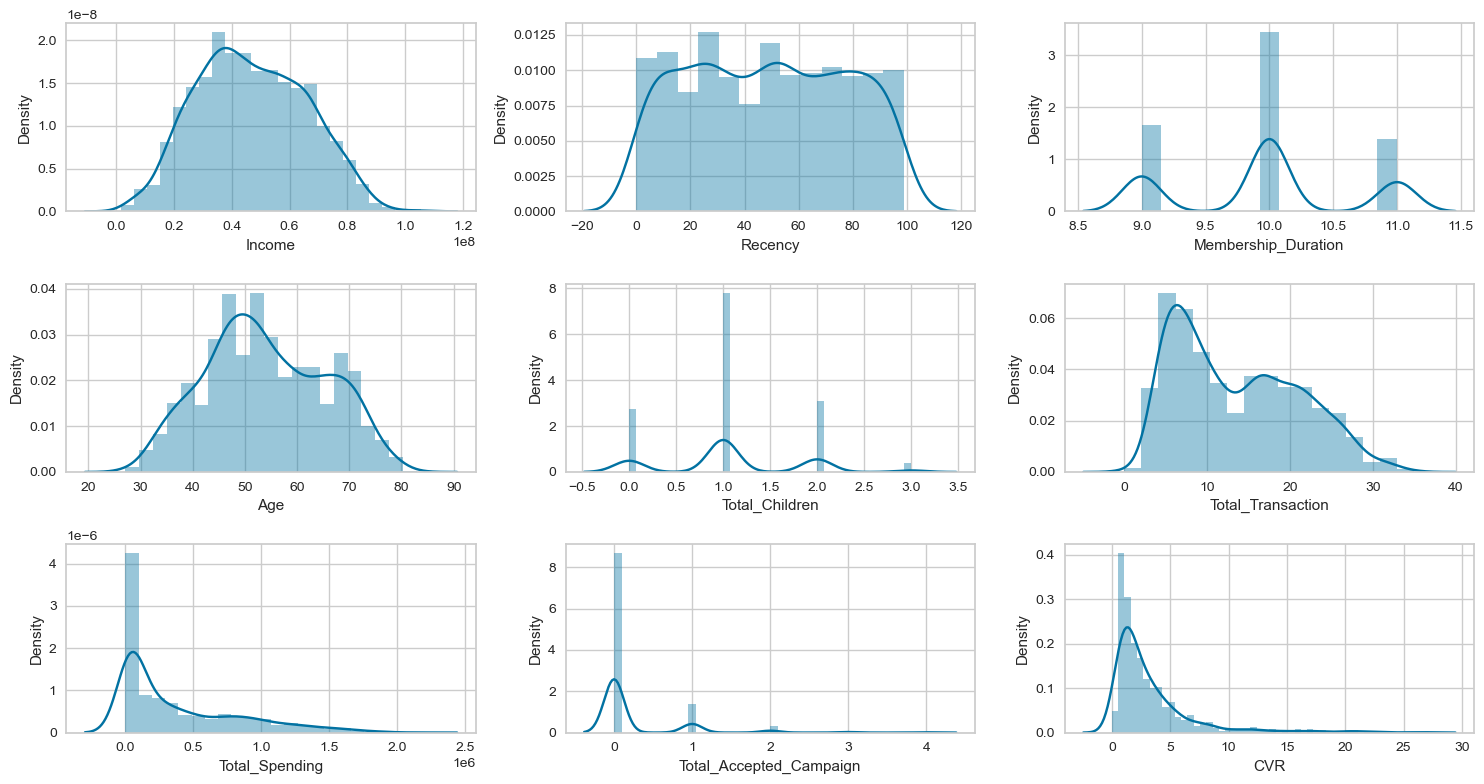

In [41]:
# cek distribusi fitur numerikal
plt.figure(figsize=(15, 8))
for i in range(0, len(n_feats)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df2[n_feats[i]])
    plt.tight_layout()

### **Key takeaways:**

Berikut adalah key takeaways dari data yang diberikan:

- Distribusi fitur
    - Distribusi fitur Income, Age, dan Recency cenderung mendekati distribusi normal. Hal ini ditunjukkan oleh plot distribusi yang berbentuk lonceng.
    - Distribusi fitur Total_Transaction, Total_Spending, dan CVR sedikit miring ke kanan (positively skewed). Hal ini ditunjukkan oleh plot distribusi yang memanjang ke arah kanan.

### **Rekomendasi**

Berdasarkan key takeaways yang telah disebutkan, berikut adalah beberapa rekomendasi untuk analisis data yang akan dilakukan:

- Analisis fitur yang mendekati distribusi normal
    - Untuk fitur yang mendekati distribusi normal, dapat dilakukan analisis statistik yang menggunakan asumsi distribusi normal, seperti uji t, uji z, dan analisis regresi linier.

- Analisis fitur yang skewed
    - Untuk fitur yang skewed, dapat dilakukan transformasi data untuk mengubah distribusinya menjadi lebih mendekati distribusi normal.

Dengan melakukan analisis yang tepat, diharapkan dapat menghasilkan insight yang lebih akurat dan bermanfaat bagi perusahaan.



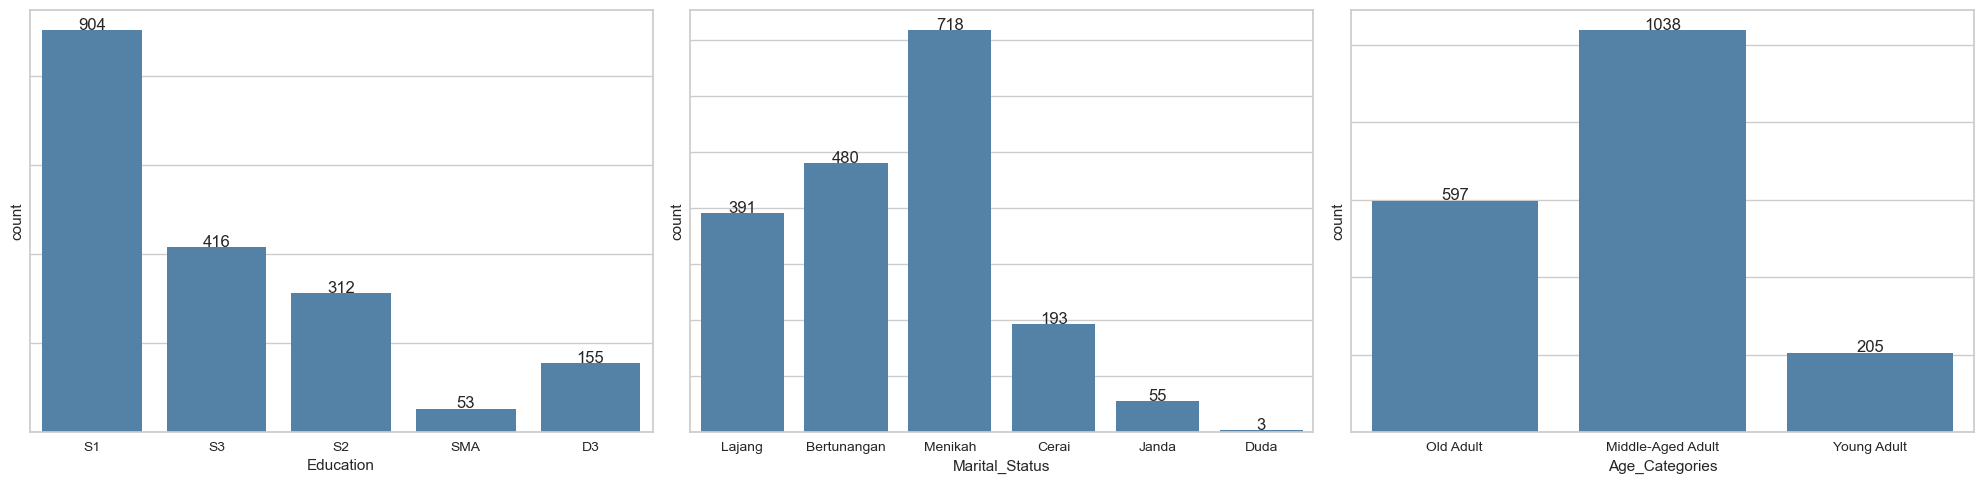

In [42]:
plt.figure(figsize=(20, 5))
for i in range(0, len(cats)):
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(x=df2[cats[i]], color='steelblue')
    
    for a in ax.patches:
        txt = np.round(a.get_height())
        anot = txt.astype('int64')
        ax.annotate(anot, (a.get_x()+a.get_width()/2, a.get_height()),
                    ha='center', va='top', xytext=(0, 9), textcoords='offset points')
    plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
    plt.tight_layout()

### Bivariate Analysis

#### Conversion Rate vs Income, Spending, and Age

Pada tahap ini akan dilakukan analisis mengenai hubungan Conversion Rate dengan income, total spending, dan usia pelanggan.

In [43]:
variable = ['Income', 'Total_Spending', 'Age']

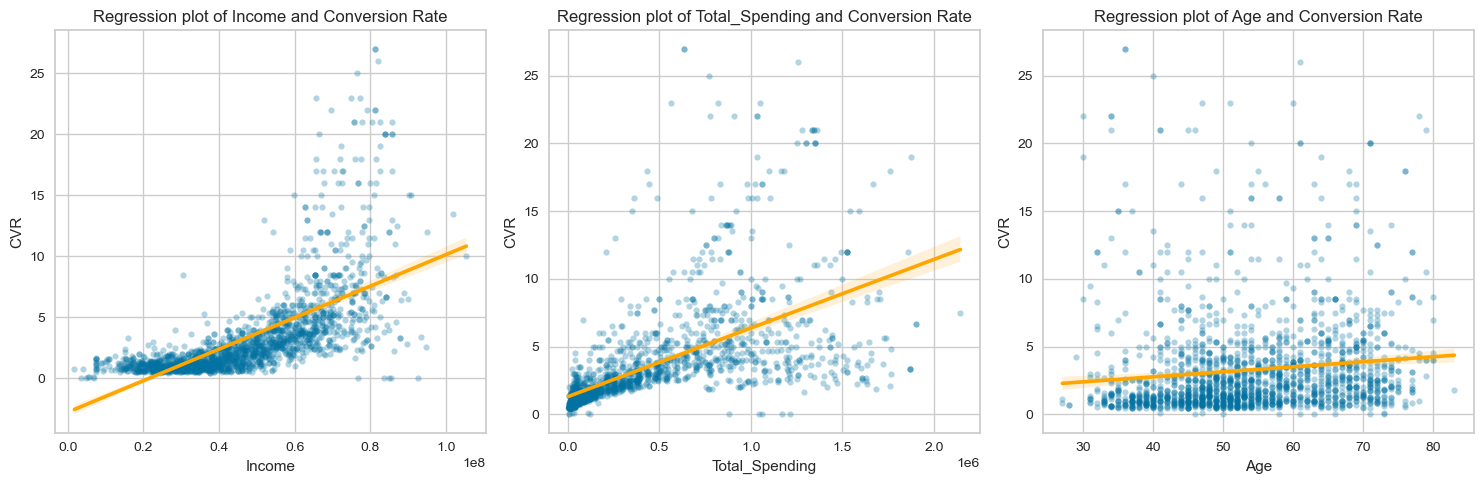

In [44]:
plt.figure(figsize=(15, 5))
for var in range(0, len(variable)):
    plt.subplot(1, 3, var+1)
    sns.regplot(x=df2[variable[var]], y='CVR', data=df2, scatter_kws={'s':20, 'alpha':0.3}, 
                line_kws={'color':'orange'}).set(title=f'Regression plot of {variable[var]} and Conversion Rate')
    plt.tight_layout()


### **Key Takeaways**

Berikut adalah key takeaways dari data yang diberikan:

- **Pendapatan dan total spending**
    - Secara keseluruhan, pendapatan dan total spending memiliki korelasi positif terhadap konversi pembelian. Hal ini berarti semakin tinggi pendapatan dan total spending, kemungkinan konversi atau pembelian dari calon konsumen juga meningkat.
    - Korelasi positif ini dapat disebabkan oleh beberapa faktor, seperti:
        - Kemampuan finansial yang lebih baik untuk memenuhi kebutuhan atau keinginan pelanggan.
    - Persepsi nilai yang tinggi terhadap produk atau layanan yang ditawarkan.

- **Usia**
    - Fitur usia cenderung tidak memiliki korelasi yang signifikan terhadap conversion rate. Ini berarti usia tidak menjadi faktor dominan yang mempengaruhi keputusan konsumen untuk melakukan konversi atau pembelian.

### **Rekomendasi**

Berdasarkan key takeaways yang telah disebutkan, berikut adalah beberapa rekomendasi untuk perusahaan:

- **Pertimbangkan target audiens dengan pendapatan dan total spending yang lebih tinggi**

    - Perusahaan dapat memperhatikan dan mengoptimalkan strategi pemasaran mereka dengan mempertimbangkan target audiens dengan pendapatan dan total spending yang lebih tinggi. Hal ini dapat dilakukan dengan menargetkan iklan atau promosi kepada kelompok pelanggan ini.

- **Kembangkan produk atau layanan yang sesuai dengan kebutuhan pelanggan dengan pendapatan dan total spending yang lebih tinggi**

    - Perusahaan dapat mengembangkan produk atau layanan yang sesuai dengan kebutuhan pelanggan dengan pendapatan dan total spending yang lebih tinggi. Hal ini dapat dilakukan dengan melakukan penelitian pasar untuk memahami kebutuhan dan keinginan pelanggan.

- **Evaluasi kembali strategi pemasaran yang menargetkan konsumen berdasarkan usia**

    - Perusahaan dapat mengevaluasi kembali strategi pemasaran yang menargetkan konsumen berdasarkan usia. Hal ini dapat dilakukan dengan melihat apakah strategi tersebut efektif dalam meningkatkan konversi. Jika tidak, perusahaan dapat mempertimbangkan untuk mengubah strategi pemasaran mereka.
    
Secara umum, data yang diberikan menunjukkan bahwa pendapatan dan total spending adalah faktor yang lebih penting dalam mempengaruhi keputusan konsumen untuk melakukan konversi atau pembelian. Perusahaan dapat memanfaatkan informasi ini untuk mengembangkan strategi pemasaran yang lebih efektif.

### Age, Income, and Spending

In [45]:
variable = ['Income', 'Total_Spending']

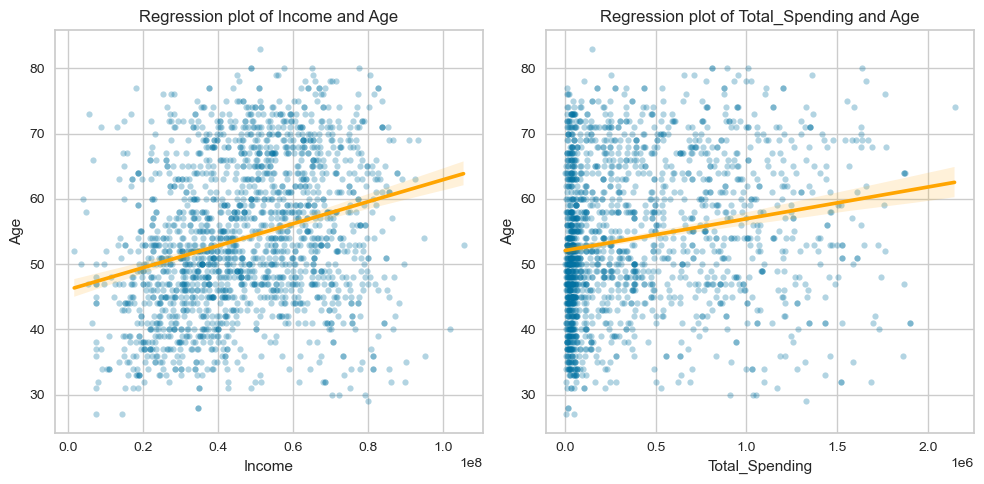

In [46]:
plt.figure(figsize=(10, 5))
for var in range(0, len(variable)):
    plt.subplot(1, 2, var+1)
    sns.regplot(x=df2[variable[var]], y='Age', data=df2, scatter_kws={'s':20, 'alpha':0.3}, 
                line_kws={'color':'orange'}).set(title=f'Regression plot of {variable[var]} and Age')
    plt.tight_layout()

### **Key Takeaways**

Berikut adalah key takeaways dari data yang diberikan:

- **Usia dan pendapatan**
    - Usia memiliki korelasi positif yang lemah dengan pendapatan. Hal ini berarti bahwa semakin tua seseorang, kemungkinan memiliki pendapatan yang lebih tinggi juga meningkat. Namun, korelasi ini tidak signifikan, yang berarti bahwa usia tidak secara langsung mempengaruhi tingkat pendapatan seseorang.

- **Usia dan total pengeluaran**
    - Usia memiliki korelasi positif yang lemah dengan total pengeluaran. Hal ini berarti bahwa semakin tua seseorang, kemungkinan memiliki total pengeluaran yang lebih tinggi juga meningkat. Namun, korelasi ini juga tidak signifikan, yang berarti bahwa usia tidak secara langsung mempengaruhi pola pengeluaran seseorang.

### **Rekomendasi**

Berdasarkan key takeaways yang disebutkan, berikut adalah beberapa rekomendasi untuk perusahaan:

- **Pertimbangkan faktor usia dalam strategi pemasaran**
    - Meskipun korelasi antara usia dan pendapatan atau total pengeluaran tidak signifikan, perusahaan masih perlu mempertimbangkan faktor usia sebagai bagian dari strategi pemasaran mereka. Hal ini karena usia dapat mempengaruhi faktor-faktor lain yang dapat memengaruhi keputusan konsumen, seperti:
        - Gaya hidup
        - Minat
        - Kebutuhan

- **Teliti faktor-faktor lain yang dapat dipengaruhi oleh usia**
    - Perusahaan dapat melakukan penelitian untuk memahami faktor-faktor lain yang dapat dipengaruhi oleh usia. Hal ini dapat membantu perusahaan untuk mengembangkan strategi pemasaran yang lebih efektif untuk menargetkan konsumen berdasarkan usia.
    
Secara umum, data yang diberikan menunjukkan bahwa usia adalah faktor yang dapat memengaruhi keputusan konsumen, tetapi tidak secara langsung. Perusahaan dapat memanfaatkan informasi ini untuk mengembangkan strategi pemasaran yang lebih efektif.

### Income and Spending

[Text(0.5, 1.0, 'Regression plot of Total Spending and Income')]

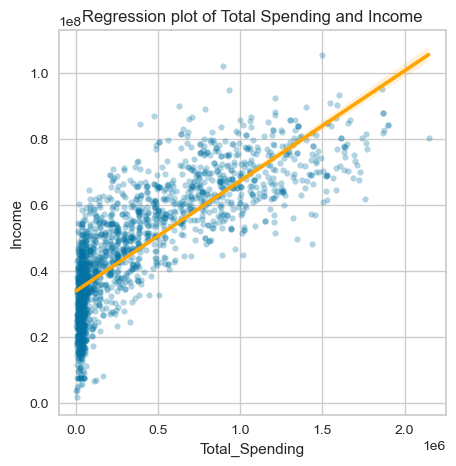

In [47]:
plt.figure(figsize=(5, 5))
sns.regplot(x='Total_Spending', y='Income', data=df2, scatter_kws={'s':20, 'alpha':0.3}, 
                line_kws={'color':'orange'}).set(title=f'Regression plot of Total Spending and Income')

### **Key Takeaways**

Berikut adalah key takeaways dari data yang diberikan:

- **Pendapatan dan total pengeluaran**
    - Income dan total spending memiliki korelasi positif yang kuat. Hal ini berarti bahwa semakin tinggi pendapatan seseorang, kemungkinan besar mereka juga memiliki pengeluaran yang lebih tinggi.
    - Korelasi ini dapat disebabkan oleh beberapa faktor, seperti:
        - Kebutuhan yang meningkat seiring dengan peningkatan pendapatan.
        - Kesempatan untuk berbelanja lebih banyak seiring dengan peningkatan pendapatan.

### **Rekomendasi**

Berdasarkan key takeaways yang disebutkan, berikut adalah beberapa rekomendasi untuk perusahaan:

- **Pertimbangkan target audiens dengan pendapatan yang tinggi**

    - Perusahaan dapat memperhatikan dan mengoptimalkan strategi pemasaran mereka dengan mempertimbangkan target audiens dengan pendapatan yang tinggi. Hal ini dapat dilakukan dengan menargetkan iklan atau promosi kepada kelompok pelanggan ini.
- **Kembangkan produk atau layanan yang sesuai dengan kebutuhan pelanggan dengan pendapatan yang tinggi**

    - Perusahaan dapat mengembangkan produk atau layanan yang sesuai dengan kebutuhan pelanggan dengan pendapatan yang tinggi. Hal ini dapat dilakukan dengan melakukan penelitian pasar untuk memahami kebutuhan dan keinginan pelanggan.

Secara umum, data yang diberikan menunjukkan bahwa pendapatan adalah faktor yang penting dalam mempengaruhi pola pengeluaran seseorang. Perusahaan dapat memanfaatkan informasi ini untuk mengembangkan strategi pemasaran yang lebih efektif.

Berikut adalah beberapa contoh bagaimana perusahaan dapat memanfaatkan informasi ini:

- Perusahaan dapat menargetkan iklan atau promosi kepada pelanggan dengan pendapatan yang tinggi untuk meningkatkan penjualan.
- Perusahaan dapat mengembangkan produk atau layanan yang lebih mahal untuk menargetkan pelanggan dengan pendapatan yang tinggi.
- Perusahaan dapat menawarkan diskon atau promosi khusus kepada pelanggan dengan pendapatan yang tinggi untuk meningkatkan loyalitas pelanggan.

### Multivariate Analysis

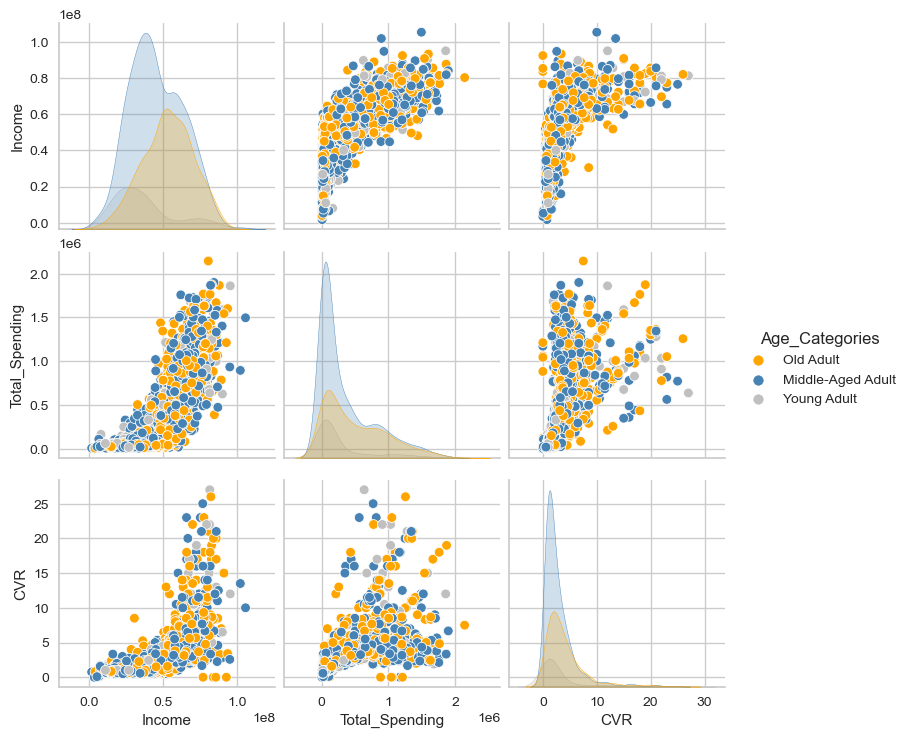

In [48]:
sns.pairplot(df2[['Income', 'Total_Spending', 'Age_Categories', 'CVR']], hue = 'Age_Categories', palette=['orange', 'steelblue','silver'])

### **Key Takeaways**

Berikut adalah key takeaways dari data yang diberikan:

- **Pola usia**

    - Distribusi usia terlihat lebih merata atau tidak terkelompok secara signifikan. Hal ini menunjukkan bahwa usia mungkin tidak menjadi faktor dominan yang mempengaruhi hubungan antara pendapatan, pengeluaran, dan tingkat konversi (CVR).
- **Pengaruh usia**

    - Usia mungkin tidak menjadi faktor dominan yang mempengaruhi hubungan antara pendapatan, pengeluaran, dan tingkat konversi (CVR). Faktor-faktor lain seperti pendapatan dan pola pengeluaran mungkin memiliki pengaruh yang lebih besar.

### **Rekomendasi**

Berdasarkan key takeaways yang disebutkan, berikut adalah beberapa rekomendasi untuk perusahaan:

- **Pertimbangkan faktor-faktor lain selain usia**

    - Meskipun usia tetap menjadi faktor penting dalam analisis dan strategi pemasaran, perusahaan perlu mempertimbangkan faktor-faktor lain selain usia. Hal ini dapat membantu perusahaan untuk mengembangkan strategi pemasaran yang lebih efektif.
- **Lakukan penelitian lebih lanjut**

    - Perusahaan dapat melakukan penelitian lebih lanjut untuk memahami faktor-faktor lain yang dapat memengaruhi hubungan antara pendapatan, pengeluaran, dan tingkat konversi (CVR). Hal ini dapat membantu perusahaan untuk memahami pengaruh usia secara lebih rinci.

Secara umum, data yang diberikan menunjukkan bahwa usia mungkin bukan faktor dominan yang mempengaruhi hubungan antara pendapatan, pengeluaran, dan tingkat konversi (CVR). Perusahaan dapat memanfaatkan informasi ini untuk mengembangkan strategi pemasaran yang lebih efektif.

Berikut adalah beberapa contoh bagaimana perusahaan dapat memanfaatkan informasi ini:

- Perusahaan dapat melakukan segmentasi pasar berdasarkan faktor-faktor lain selain usia.
- Perusahaan dapat mengembangkan strategi pemasaran yang menargetkan kelompok pelanggan dengan karakteristik tertentu, seperti pendapatan atau pola pengeluaran.
- Perusahaan dapat melakukan penelitian lebih lanjut untuk memahami kebutuhan dan keinginan pelanggan berdasarkan faktor-faktor lain selain usia.

## Data Preprocessing

In [49]:
df_prep = df2.copy()

### Feature Encoding

- Melakukan encoding untuk fitur-fitur kategorikal
- Education
    - SMA : 0
    - D3 : 1
    - S1 : 3
    - S2 : 4
    - S3 : 5

In [50]:
# education
mapping_education = {'SMA' : 0, 
                     'D3' : 1, 
                     'S1' : 2, 
                     'S2' : 3, 
                     'S3' : 4}

df_prep['education_encd'] = df_prep['Education'].map(mapping_education)

### Standardization

Standardisasi digunakan untuk mengubah skala atau rentang nilai dari fitur-fitur yang digunakan dalam proses clustering. Dalam clustering (k-means), perbedaan skala atau rentang nilai yang signifikan antara fitur dapat mempengaruhi hasil clustering. Dengan melakukan standardisasi, fitur-fitur akan memiliki mean (rata-rata) yang mendekati 0 dan deviasi standar yang mendekati 1. Dengan demikian, standardisasi memastikan bahwa setiap fitur memiliki kontribusi yang seimbang dalam proses clustering.

In [51]:
df_s = df_prep.copy()

In [52]:
X = df_s.drop(columns=['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Age_Categories', 'Dt_Customer'])

In [53]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [54]:
X.head(3)

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_Revenue,Response,Membership_Duration,Age,Total_Children,Total_Transaction,Total_Spending,Total_Accepted_Campaign,CVR,education_encd
0,-0.032256,0.876749,0.809803,-0.365148,-0.760019,-0.550891,-0.733803,-0.552627,-0.679909,-0.666071,...,0.0,-0.377964,-1.400057,1.308689,1.283647,-1.021472,-0.837133,-0.401435,-0.570350,-0.469878
1,1.321897,-0.950225,-1.022962,-0.780333,0.551282,1.078317,0.235689,2.018054,0.421110,0.119971,...,0.0,-0.377964,0.061148,0.349991,-1.501624,1.000954,0.723299,-0.401435,0.536465,-0.469878
2,-1.087862,0.876749,-1.022962,-0.780333,-0.760019,-0.449065,-0.621630,-0.363953,-0.569807,-0.687905,...,0.0,-0.377964,-1.400057,-1.305942,-0.108989,-0.751815,-0.780840,-0.401435,-0.534823,-0.469878


## Modeling

In [55]:
df_model = X.copy()

### PCA

PCA dilakukan untuk mengurangi dimensi data dengan mempertahankan informasi yang signifikan.

In [56]:
from sklearn.decomposition import PCA 

# fit pca
pca = PCA(n_components = 2)
pca.fit(df_model)

# pca transformed 
data_pca = pca.transform(df_model)

In [57]:
data_pca1 = pd.DataFrame(data_pca)

### Finding the Best Cluster

In [58]:
# mencari nilai k optimal dengan parameter inertia
from sklearn.cluster import KMeans

inertia = []
k_values = range(2,11)

# fit model
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(data_pca1)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

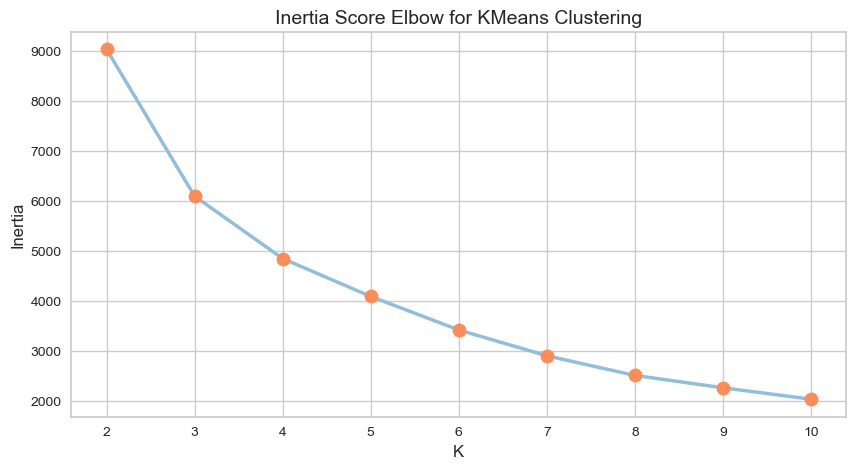

In [59]:
# Visualisasi grafik elbow method
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10, 5))

# plot grafik
plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#fc8d59', markersize=10)
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=14)
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

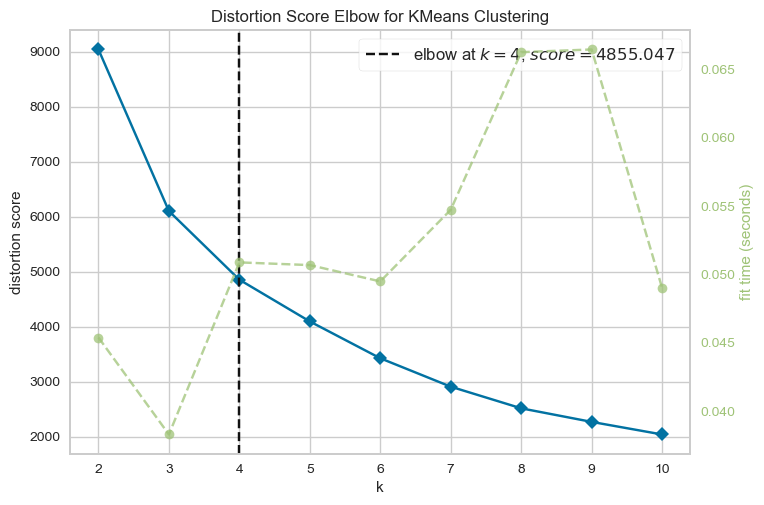

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
# visualisasi dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(data_pca1)       
visualizer.show() 

### **Key Takeaways**

Berdasarkan Distortion Score dan Elbow methode, didapatkan jumlah cluster terbaik adalah 4. Hal ini ditunjukkan oleh grafik Distortion Score yang menurun secara signifikan setelah k = 4. Selain itu, grafik Elbow methode juga menunjukkan adanya perubahan yang signifikan pada nilai k = 4.

### **Rekomendasi**

Berdasarkan key takeaways yang disebutkan, berikut adalah beberapa rekomendasi untuk perusahaan:

- Gunakan jumlah cluster 4 untuk segmentasi pasar

    - Perusahaan dapat menggunakan jumlah cluster 4 untuk segmentasi pasar. Hal ini dapat membantu perusahaan untuk memahami pelanggan mereka dengan lebih baik dan mengembangkan strategi pemasaran yang lebih efektif.
- Lakukan analisis lebih lanjut pada masing-masing cluster

    - Perusahaan dapat melakukan analisis lebih lanjut pada masing-masing cluster untuk memahami karakteristik dan kebutuhan pelanggan di masing-masing cluster. Hal ini dapat membantu perusahaan untuk mengembangkan strategi pemasaran yang lebih spesifik untuk masing-masing cluster.

Secara umum, data yang diberikan menunjukkan bahwa jumlah cluster terbaik adalah 4. Perusahaan dapat memanfaatkan informasi ini untuk mengembangkan strategi pemasaran yang lebih efektif.

Berikut adalah beberapa contoh bagaimana perusahaan dapat memanfaatkan informasi ini:

- Perusahaan dapat menargetkan iklan atau promosi kepada kelompok pelanggan di masing-masing cluster untuk meningkatkan penjualan.
- Perusahaan dapat mengembangkan produk atau layanan yang sesuai dengan kebutuhan pelanggan di masing-masing cluster.
- Perusahaan dapat menawarkan diskon atau promosi khusus kepada pelanggan di masing-masing cluster untuk meningkatkan loyalitas pelanggan.

### Clustering with K-Means

In [61]:
from sklearn.cluster import KMeans

# fit model
kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(data_pca1.values)
data_pca1['cluster'] = kmeans.labels_

In [62]:
data_pca1.sample(5)

,0,1,cluster
653,0.240020,0.471545,3
1098,5.122858,-0.923648,2
1509,-2.610550,-0.620926,0
845,-1.991383,0.101842,0
514,-2.540644,-0.335704,0


Text(0.5, 1.0, 'Cluster Segementation')

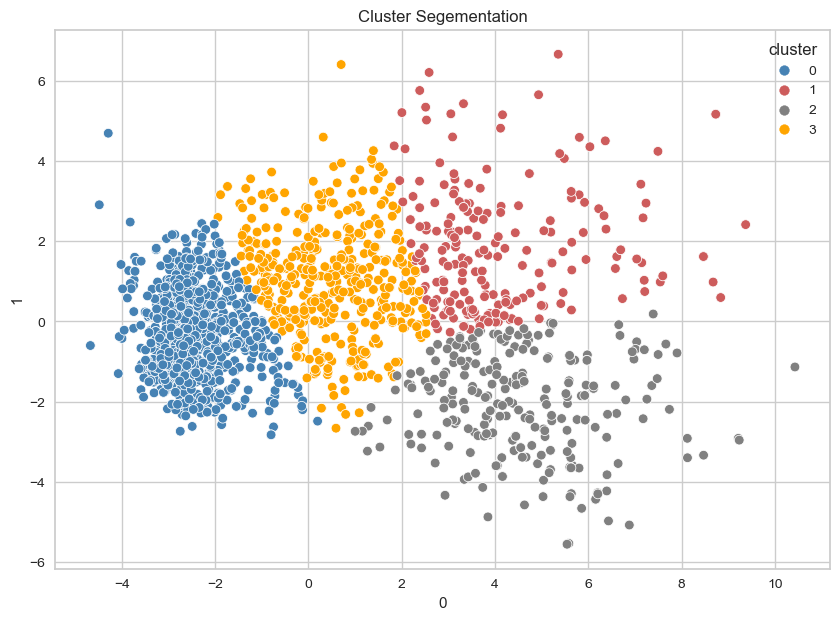

In [63]:
# visualisasi hasi segmentasi
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=data_pca1, x=0, y=1, hue='cluster', palette=color)
plt.title('Cluster Segementation')

### Evaluation

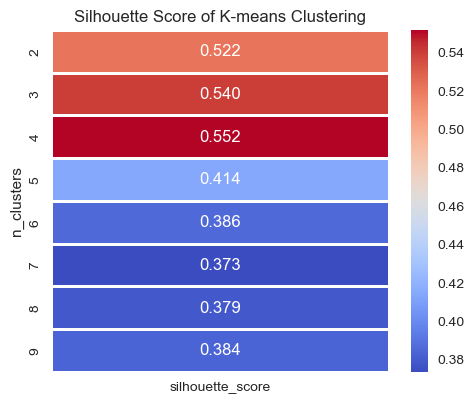

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    # Convert feature/column names to strings
    data.columns = data.columns.astype(str)

    clusters_range = range(2, 10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=123)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(5, 4))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='coolwarm')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

# Assuming data_pca1 is your PCA-transformed data
visualize_silhouette_layer(data_pca1)

### **Key Takeaways**

Berdasarkan Silhouette Score, jumlah cluster terbaik yang direkomendasikan adalah 4. Hal ini ditunjukkan oleh nilai Silhouette Score yang lebih tinggi dibandingkan dengan jumlah cluster lainnya. Nilai Silhouette Score yang lebih tinggi menandakan kualitas clustering yang lebih baik.

### **Rekomendasi**

Berdasarkan key takeaways yang disebutkan, berikut adalah beberapa rekomendasi untuk perusahaan:

- **Gunakan jumlah cluster 4 untuk segmentasi pasar**

    - Perusahaan dapat menggunakan jumlah cluster 4 untuk segmentasi pasar. Hal ini dapat membantu perusahaan untuk memahami pelanggan mereka dengan lebih baik dan mengembangkan strategi pemasaran yang lebih efektif.
- **Lakukan analisis lebih lanjut pada masing-masing cluster**

    - Perusahaan dapat melakukan analisis lebih lanjut pada masing-masing cluster untuk memahami karakteristik dan kebutuhan pelanggan di masing-masing cluster. Hal ini dapat membantu perusahaan untuk mengembangkan strategi pemasaran yang lebih spesifik untuk masing-masing cluster.

Secara umum, data yang diberikan menunjukkan bahwa jumlah cluster terbaik adalah 4. Perusahaan dapat memanfaatkan informasi ini untuk mengembangkan strategi pemasaran yang lebih efektif.

Berikut adalah beberapa contoh bagaimana perusahaan dapat memanfaatkan informasi ini:

- Perusahaan dapat menargetkan iklan atau promosi kepada kelompok pelanggan di masing-masing cluster untuk meningkatkan penjualan.
- Perusahaan dapat mengembangkan produk atau layanan yang sesuai dengan kebutuhan pelanggan di masing-masing cluster.
- Perusahaan dapat menawarkan diskon atau promosi khusus kepada pelanggan di masing-masing cluster untuk meningkatkan loyalitas pelanggan.

# Customer Personality Analysis for Marketing Retargeting


In [78]:
df_prep['Cluster'] = kmeans.labels_

### Summary

Analisis statistik berdasarkan hasil cluster

In [79]:
feats = ['Recency','Total_Transaction','Total_Spending', 'Income', 'CVR','Cluster', 'Age']
data_summary = df_prep[feats]

In [80]:
round(data_summary.groupby('Cluster').agg(['median']),2).round()

,Recency,Total_Transaction,Total_Spending,Income,CVR,Age
,median,median,median,median,median,median
Cluster,,,,,,
0,49.0,7.0,41000.0,33297500.0,1.0,50.0
1,48.0,25.0,1027000.0,65215000.0,4.0,59.0
2,48.0,20.0,927000.0,71367000.0,8.0,54.0
3,49.0,17.0,379000.0,52614000.0,3.0,58.0


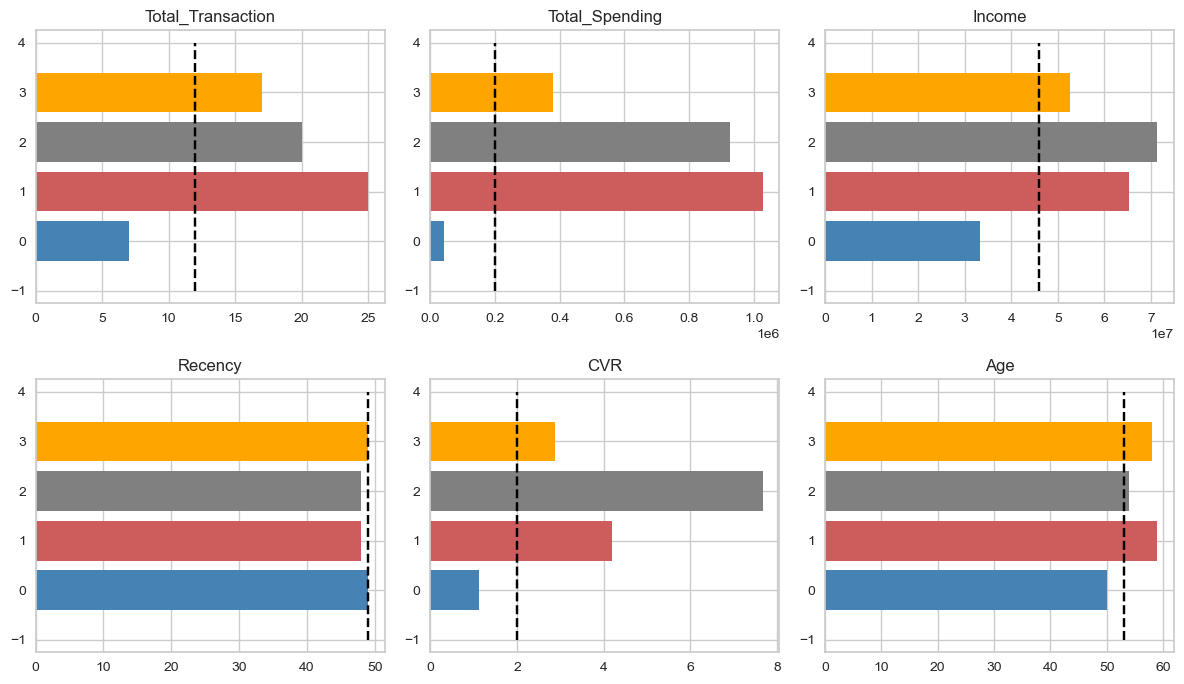

In [81]:
def dist_list(lst):
    plt.figure(figsize=[12, 7])
    i = 1
    for col in lst:
        ax = plt.subplot(2, 3, i)
        ax.vlines(df_prep[col].median(), ymin=-1, ymax=4, color='black', linestyle='--')
        g = df_prep.groupby('Cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x, y, color=color) 
        plt.title(col)
        i = i + 1

dist_list(['Total_Transaction','Total_Spending', 'Income', 'Recency', 'CVR', 'Age'])
plt.tight_layout()
plt.show()

### **Key takeaways:**

Berdasarkan hasil clustering dapat diketahui karakteristik dari setiap segment cluster

- Cluster 0
    - Angka transaksi dan spending teredndah yaitu mayoritas 7 transaksi dan Rp.58.000 perbulan
    - Pendapatan terendah, mayoritas Rp.33.297.500/tahun
    - Conversion terendah, yaitu 1%
    - Mayoritas usia 50 tahun
- Cluster 1
    - Angka transaksi dan spending tertinggi yaitu mayoritas hanya 25 transaksi dan Rp.1.116.000 perbulan
    - Pendapatan cukup tinggi, mayoritas Rp.65.215.000/tahun
    - Conversion rate sedang, yaitu 4%
    - Mayoritas usia 60 tahun
- Cluster 2
    - Angka transaksi dan spending cukup tinggi yaitu mayoritas 20 transaksi dan Rp.1.040.000 perbulan
    - Pendapatan tertinggi, mayoritas Rp.71.488.000/tahun
    - Conversion rate tertinggi, yaitu 8%
    - Mayoritas usia 54 tahun
- Cluster 3
    - Angka transaksi dan spending sedang yaitu mayoritas 17 transaksi dan Rp.434.000 perbulan
    - Pendapatan cukup sedang, mayoritas Rp.52.597.000/tahun
    - Conversion rate cukup sedang, yaitu 3%
    - Mayoritas usia 58 tahun

Dari karakteriktik tersebut, dapat setiap cluster dapat dikelompok berdasarkan kategori, yaitu:

- Cluster 0: "Low-Transaction Low-Spending Group" - Low Customer
- Cluster 1: "High-Transaction High-Spending Group" - High Customer A
- Cluster 2: "High-Income High-Conversion Group" - High Customer B
- Cluster 3: "Moderate-Transaction Moderate-Spending Group" - Moderate Customer

### Percentage

In [82]:
# persentase total customer setiap cluster
cluster_count = data_summary['Cluster'].value_counts().reset_index()
cluster_count.columns = ['Cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(data_summary))*100,2)
cluster_count = cluster_count.sort_values(by=['Cluster']).reset_index(drop=True)
cluster_count

,Cluster,count,percentage (%)
0,0,924,50.22
1,1,218,11.85
2,2,257,13.97
3,3,441,23.97


([<matplotlib.axis.XTick at 0x10f9733d0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

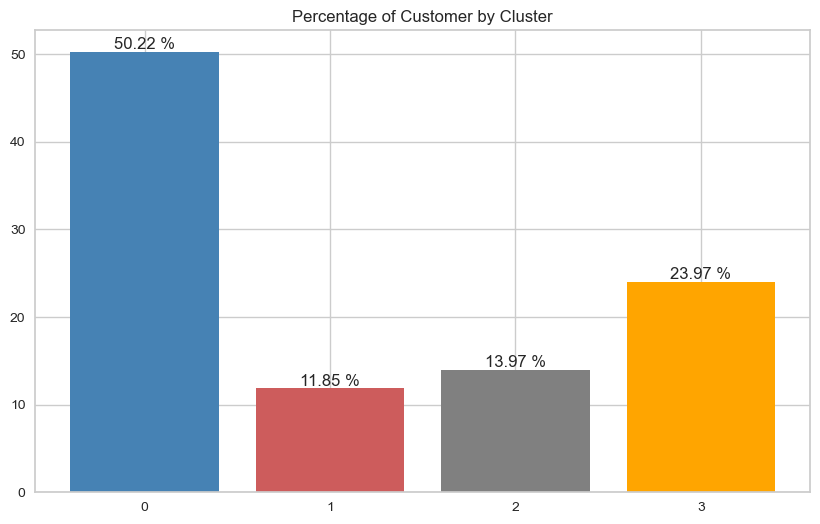

In [83]:
#visualisasi persentase customer pada setiap cluster
fig, ax = plt.subplots(figsize=(10,6))

bars = plt.bar(x=cluster_count['Cluster'], height= cluster_count['percentage (%)'], color=color)

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height} %', ha='center',va='bottom')

plt.title('Percentage of Customer by Cluster')
plt.xticks(range(0,4))

### **Key takeaways:**

- Berdasarkan hasil analisis, ditemukan bahwa sekitar 50% dari populasi termasuk dalam kelompok Low Customer. Meskipun kelompok ini memiliki angka transaksi dan pengeluaran yang rendah, namun karena populasi mereka yang besar, perusahaan dapat fokus untuk menarik perhatian mereka.
- Sedangkan populasi High Customer A dan B cenderung rendah, namun memiliki potensi transaksi, spending, konversi, dan income yang tinggi. Perusahaan dapat mempertimbangkan strategi pemasaran yang lebih personal dan eksklusif untuk menarik minat mereka.

### Univariate Analysis

Univariate analisis ini dilakukan untuk mengetahui distribusi fitur berdasarkan cluster

In [84]:
variable = [ 'Recency', 'Total_Transaction', 'Total_Spending', 'Income', 'NumWebVisitsMonth', 'Total_Accepted_Campaign', 'CVR', 'Membership_Duration', 
            'Age', 'education_encd']

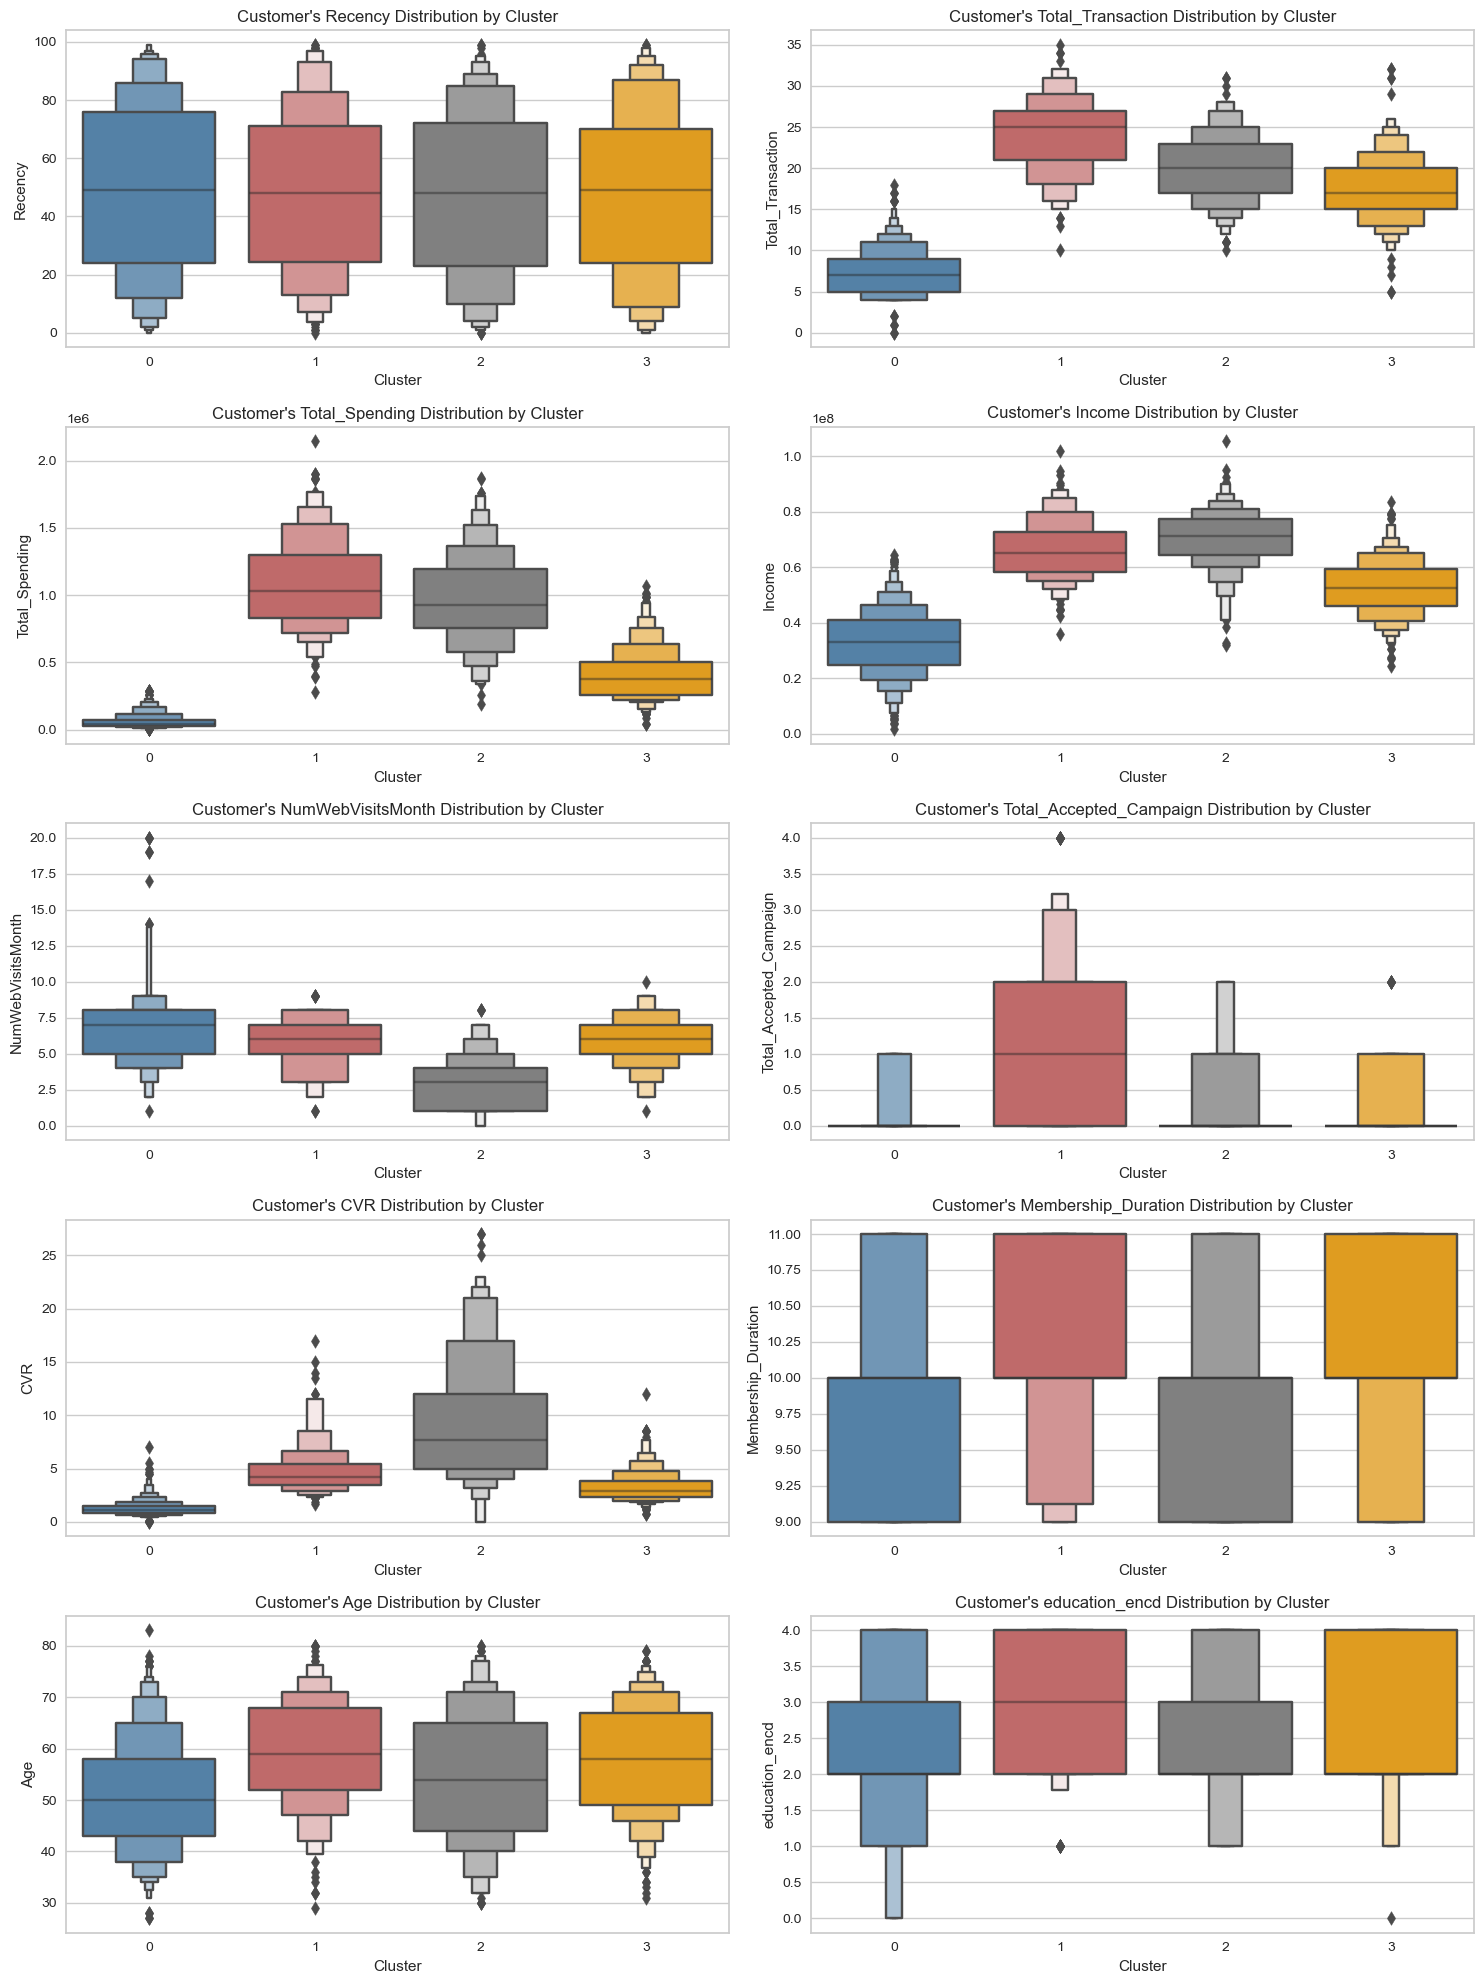

In [85]:
# distribusi cluster
plt.figure(figsize=(15, 20))
for i in range(0, len(variable)):
    plt.subplot(5, 2, i+1)
    sns.boxenplot(x='Cluster', y=df_prep[variable[i]], data=df_prep, palette=color).set(title=f'Customer\'s {variable[i]} Distribution by Cluster')
    plt.tight_layout()

### **Key Takeaways**

Berdasarkan analisis data, didapatkan beberapa hal menarik sebagai berikut:

- Cluster 0 (Low Customer) memiliki distribusi jumlah kunjungan website yang tinggi, namun memiliki total acceptance campaign yang rendah. Hal ini menunjukkan bahwa kelompok ini sangat sering mengunjungi website perusahaan, tetapi tidak sepenuhnya menyadari atau tidak responsif terhadap campaign yang ditawarkan.
- Cluster 1 (High Customer A) memiliki total acceptance campaign yang tinggi, namun memiliki tingkat konversi yang sedang. Hal ini menunjukkan bahwa mayoritas pelanggan dalam kelompok ini sangat responsif terhadap campaign yang ditawarkan oleh perusahaan.
- Cluster 2 (High Spender B) memiliki distribusi konversi rate yang lebih tinggi dengan respon campaign yang tidak terlalu tinggi. Hal ini menunjukkan bahwa kelompok ini memiliki kecenderungan pengeluaran yang tinggi dan cenderung merespons positif terhadap kampanye yang ditawarkan, meskipun mereka tidak begitu aktif dalam kunjungan ke website.

### **Rekomendasi**

Berdasarkan hal-hal menarik tersebut, berikut adalah beberapa rekomendasi untuk perusahaan:

- Untuk Cluster 0 (Low Customer), perusahaan perlu mengembangkan strategi yang tepat untuk menarik perhatian dan meningkatkan keterlibatan mereka. Strategi ini dapat berupa:

    - Menyajikan konten yang lebih relevan dengan kebutuhan dan minat mereka.
    - Menggunakan bahasa yang lebih sederhana dan mudah dimengerti.
    - Menawarkan insentif yang lebih menarik untuk mendorong mereka untuk berpartisipasi dalam campaign.

- Untuk Cluster 1 (High Customer A), perusahaan dapat meningkatkan interaksi dan pembelian dari kelompok ini dengan meluncurkan campaign yang lebih menarik dan relevan sesuai dengan preferensi mereka. Hal ini dapat dilakukan dengan melakukan penelitian lebih lanjut untuk memahami kebutuhan dan keinginan pelanggan dalam kelompok ini.

- Untuk Cluster 2 (High Spender B), perusahaan dapat mengoptimalkan saluran komunikasi lain seperti email, media sosial, atau platform online lainnya untuk efektif menjangkau kelompok ini. Selain itu, perusahaan dapat menawarkan insentif yang lebih menarik untuk mendorong mereka untuk berpartisipasi dalam campaign.

Secara umum, perusahaan dapat memanfaatkan informasi dari hasil analisis data untuk mengembangkan strategi pemasaran yang lebih efektif dan sesuai dengan kebutuhan masing-masing kelompok pelanggan.

### Multivariate Analysis

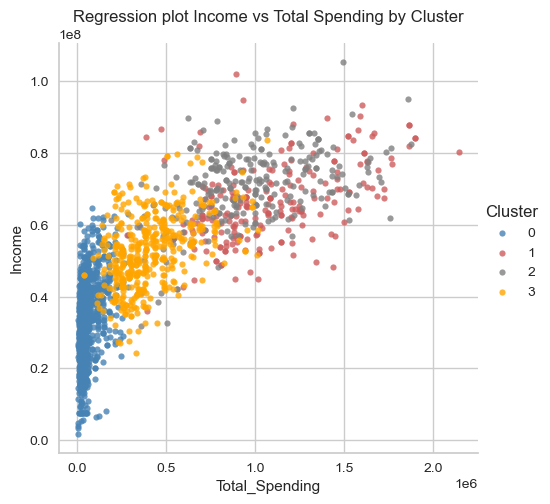

In [86]:
sns.lmplot(y='Income', x='Total_Spending', hue='Cluster', fit_reg=False, data=df_prep, palette=color, scatter_kws={'s':20, 'alpha':0.8}).set(
    title='Regression plot Income vs Total Spending by Cluster')

### **Key takeaways :**

Berdasarkan plot korelasi antara pendapatan (Income) dan total pengeluaran (Total Spending), terlihat bahwa terbentuknya cluster atau kelompok yang dapat dibedakan. Terlihat bahwa High cluster 1 dan 3 cenderung berada dalam satu kelompok, yaitu dalam kategori high customer. Hal ini menunjukkan adanya hubungan positif antara tingkat pendapatan dan pengeluaran pelanggan dalam kelompok tersebut. Dengan mengetahui pola korelasi ini, perusahaan dapat mengoptimalkan strategi pemasaran dan penawaran produk mereka.